## Программирование и анализ данных

*Алла Тамбовцева, НИУ ВШЭ*

### Разведывательный анализ данных в Python

На этом занятии мы обсудим, как с помощью библиотек Python выявить наличие связи в данных и визуализировать эту связь. Для начала загрузим библиотеку `pandas`:

In [1]:
import pandas as pd

Теперь загрузим данные по ссылке из csv-файла:

In [2]:
wgi = pd.read_csv("https://allatambov.github.io/pydj/seminars/wgi-new.csv")

In [3]:
wgi.head()

,Unnamed: 0,X,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh_score,not_free,partly_free,free,fh_type
0,1,1,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN,NaN,NaN,NaN,NaN
1,2,2,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0,0.0,0.0,1.0,free
2,3,3,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0,1.0,0.0,0.0,not_free
3,4,4,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0,1.0,0.0,0.0,not_free
4,5,6,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0,0.0,1.0,0.0,partly_free


**Показатели в датафрейме:**

* `X` — id страны;
* `country` — название страны;
* `cnt_code` — код страны;
* `year` — год;
* `va` — индекс *Voice and Accountability*;
* `ps` — индекс *Political Stability and Lack of Violence*;
* `ge` — индекс *Government Effectiveness*;
* `rq` — индекс *Regulatory Quality*;
* `rl` — индекс *Rule of Law*;
* `cc` — индекс *Control of Corruption*;
* `fh_score` — индекс *Freedom Rating от Freedom House*;
* `fh_type` – тип страны согласно *Freedom House*;
* `not_free` – 1, если страна типа *not free*, 0 – иначе;
* `partly_free` – 1, если страна типа *partly free*, 0 – иначе;
* `free` –  1,  если страна типа *free*, 0 – иначе.

### Связь между количественными показателями: корреляция

Посмотрим на корреляцию между показателями *Voice and Accountability* и *Control of Corruption*. Воспользуемся средствами `pandas`: для удобства сохраним интересующие нас столбцы в переменные `x` и `y`, а потом воспользуемся методом `.corr()`:

In [4]:
x = wgi["va"]
y = wgi["cc"]
x.corr(y) 

0.7440281421154982

Получили относительно высокий положительный коэффициент корреляции, связь между показателями положительная, прямая. По умолчанию метод `corr()` вычисляет коэффициент корреляции Пирсона. Если бы нам нужно было посчитать коэффициент ранговой корреляции Спирмена (для данных в порядковой шкале или в случае наличия выборосов), в метод `.corr()` мы бы добавили аргумент `method`:

In [5]:
x.corr(y, method = "spearman") 

0.7674053334181091

Если мы хотим не просто получить коэффициент корреляции, но и проверить его значимость, нам потребуется модуль `stats` из библиотеки `scipy`:

In [6]:
import scipy.stats

Возьмем функцию `pearsonr()` для коэффициента корреляции Пирсона: 

In [7]:
scipy.stats.pearsonr(x, y) 

(0.7440281421154986, 7.114538432766108e-37)

Эта функция возвращает кортеж из двух чисел: значение выборочного коэффициента корреляции и p-value. Что показывает p-value, если говорить неформально? Жизнеспособность нулевой гипотезы, проверяемой с помощью статистического теста. А нулевая гипотеза, которая здесь тестируется такая:

$$H_0: r = 0 \text{ (связи нет) }$$

Значение p-value здесь маленькое, меньше значения $\alpha = 0.05$ ($\alpha$ – уровень значимости, вероятность совершить ошибку, отвергнув верную нулевую гипотезу). Поэтому можем сделать вывод о том, что нулевую гипотезу необходимо отвергнуть – связь между показателями действительно есть.

Аналогичным образом можем посчитать коэффициент корреляции Спирмена – метод `.spearmanr()`:

In [8]:
scipy.stats.spearmanr(x, y) 

SpearmanrResult(correlation=0.7674053334181091, pvalue=1.8111754866246873e-40)

### Связь между количественными показателями: диаграммы рассеяния

Теперь попробуем построить диаграммы рассеяния (*scatterplots*) с помощью `seaborn`. Загрузим библиотеку и выставим настройки для графиков:

In [9]:
import seaborn as sns
sns.set() 

Теперь построим диаграмму рассеяния для столбцов `va` (*Voice and Accountability*) и `cc` (*Control of Corruption*): 

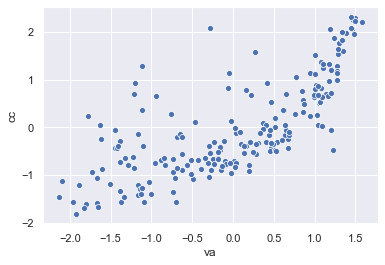

In [10]:
sns.scatterplot(data = wgi, x = 'va', y = 'cc') 

Можем поменять цвет точек: 

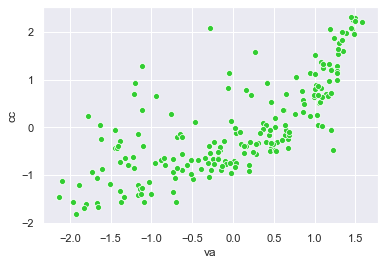

In [11]:
sns.scatterplot(data = wgi, x = 'va', y = 'cc', color = "limegreen") 

А можем поменять цвет точек более содержательно – в зависимости от значений в столбце `fh_type`:

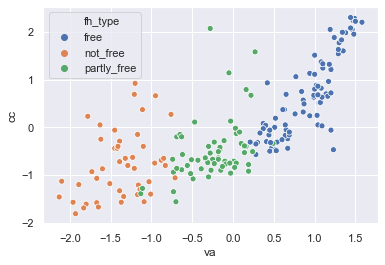

In [12]:
sns.scatterplot(data = wgi, x = 'va', y = 'cc', 
                hue = 'fh_type')

Если столбец, который мы используем для группировки по цвету, текстовый, то точки просто раскрашиваются в фиксированное число цветов. Если этот столбец числовой, то будет использоваться последовательная палитра цветов – от наиболее светлого оттенка (маленькие значения) до наиболее темного (большие значения):

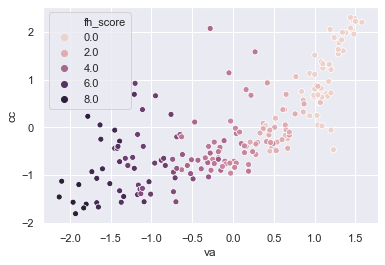

In [13]:
sns.scatterplot(data = wgi, x = 'va', y = 'cc', 
                hue = 'fh_score')

В легенде графика в соответствии цветов указываются пограничные значения. Например, розовый цвет соответствует значениям `fh_score` от 2 до 4, исключая 4. 

А можно еще добавить аргумент `size` и построить не просто диаграмму рассеяния, а пузырьковую диаграмму (*bubble plot*)! Сделаем цвет точек зависимым от `fh_type`, а размер – от `fh_score`:

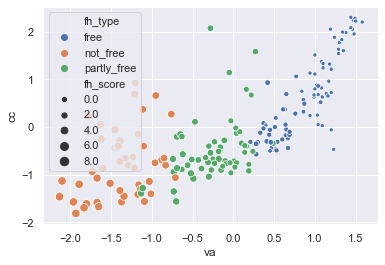

In [14]:
sns.scatterplot(data = wgi, x = 'va', y = 'cc', 
                hue = 'fh_type', size = 'fh_score')

Немного поправим график. Сделаем точки покрупнее – зафиксируем минимальный и максимальный размер точки в аргументе `sizes`. Плюс, изменим палитру (см. варианты [здесь](https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html)). 

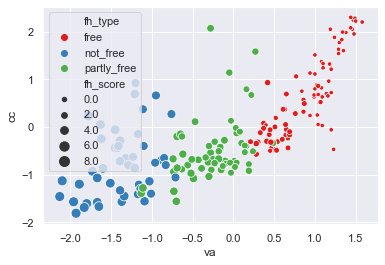

In [15]:
sns.scatterplot(data = wgi, x = 'va', y = 'cc', 
                hue = 'fh_type', size = 'fh_score',
               sizes = (20, 100), palette = 'Set1')

Если мы хотим вынести легенду за рамки графика, проще всего выбрать другую функцию – функцию `relplot()` (от *relationships*):

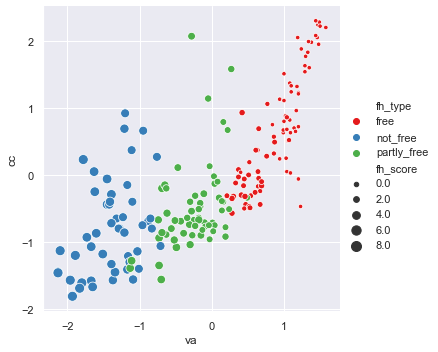

In [16]:
sns.relplot(data = wgi, x = 'va', y = 'cc', 
                hue = 'fh_type', size = 'fh_score',
               sizes = (20, 100), palette = 'Set1')

Напоследок подпишем оси:

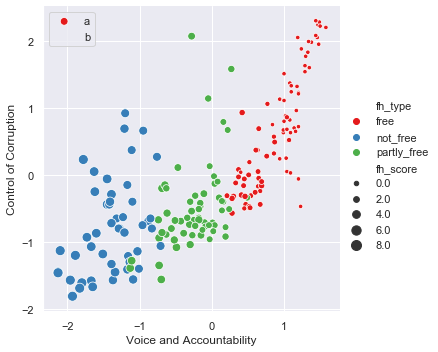

In [19]:
import matplotlib.pyplot as plt

sns.relplot(data = wgi, x = 'va', y = 'cc', 
                hue = 'fh_type', size = 'fh_score',
               sizes = (20, 100), palette = 'Set1')
plt.xlabel('Voice and Accountability')
plt.ylabel('Control of Corruption')
plt.legend(['a','b'])

### Связь между количественными показателями: корреляционная матрица

Для начала выберем несколько столбцов и сохраним их в датарейм поменьше:

In [20]:
small = wgi[["va", "rl", "rq", "cc"]]

Теперь посмотрим на корреляционную матрицу:

In [21]:
small.corr()

,va,rl,rq,cc
va,1.000000,0.755064,0.714165,0.744028
rl,0.755064,1.000000,0.923150,0.946401
rq,0.714165,0.923150,1.000000,0.874634
cc,0.744028,0.946401,0.874634,1.000000


Обратите внимание: метод `.corr()` работает как для объекта *pandas Series*(отдельный столбец), так и для объекта *pandas DataFrame* (вся таблица). Только в первом случае он выдает значение коэффициента корреляции, а во втором – матрицу коэффициентов для каждой пары показателей в таблице. 

Теперь визуализируем эту матрицу с помощью функции `heatmap()`:

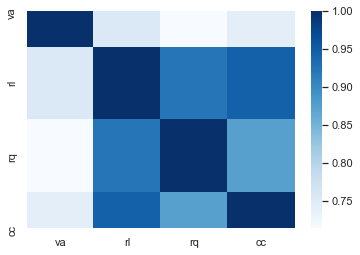

In [22]:
sns.heatmap(small.corr(), cmap = 'Blues')  # cmap – палитра цветов

Более высоким значениям корреляции соответствуют более темные клетки на графике.

### Связь между качественными показателями

Теперь посмотрим на связь между двумя качественными показателями. Загрузим данные из файла `Cowles.csv`:

In [24]:
cow = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/Cowles.csv")

In [25]:
cow.head()

,Unnamed: 0,neuroticism,extraversion,sex,volunteer
0,1,16,13,female,no
1,2,8,14,male,no
2,3,5,16,male,no
3,4,8,20,female,no
4,5,9,19,male,no


**Показатели в файле:**

* `neuroticism` – уровень нейротизма (тревожности);
* `extraversion` – уровень экстраверсии;
* `sex` – пол;
* `volunteer` – участие в волонтерских мероприятиях.

Проверим, зависит ли участие в волонтерских мероприятиях от пола. Сначала построим таблицу сопряженности, чтобы понять, как выглядит совместное распределение значений:

In [26]:
tab = pd.crosstab(cow['sex'], cow['volunteer']) 
tab

volunteer,no,yes
sex,,
female,431,349
male,393,248


Загрузим модуль `stats` из библиотеки `statsmodels`:

In [27]:
from statsmodels.api import stats

Преобразуем табличку `tab` выше в специальный объект типа `Table`:

In [28]:
cont_table = stats.Table(tab) 
cont_table

Теперь мы можем применить критерий хи-квадрат, который проверяет следующую нулевую гипотезу:

$$H_0: \text{связи нет}$$

In [29]:
res = cont_table.test_nominal_association() 
res.pvalue  # извлечем p-value

0.021406187349667816

Здесь p-value меньше 0.05, поэтому нулевая гипотеза отвергается – связь есть.

### Немного о линейных регрессиях

Для построения линейной регрессии импортируем функцию `ols` из библиотеки `statsmodels`:

In [30]:
from statsmodels.formula.api import ols

Построим модель, где зависимой переменной является `va`, а независимой `cc`, то есть:

$$\text{va} = \beta_0 + \beta_1 \times \text{cc}.$$

In [31]:
model = ols("va ~ cc", wgi).fit() 

До `~` указывается зависимая переменная, после – независимая. Формула для модели указывается в виде строки в кавычках. Запись выше означает следующее: создай модель типа `ols` (модель с оцениванием методом наименьших квадратов – *ordinary least squares*) и оцени ее с помощью метода `.fit()`. 

Теперь посмотрим на результаты:

In [32]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     va   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     248.0
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           7.11e-37
Time:                        23:05:37   Log-Likelihood:                -204.62
No. Observations:                 202   AIC:                             413.2
Df Residuals:                     200   BIC:                             419.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0173      0.047      0.366      0.715      -0.076       0.110
cc             0.7470      0.047     15.748      0.000       0.653       0.841
==============================================================================
Omnibus:                       22.752   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.772
Skew:                          -0.855   Prob(JB):                     1.54e-06
Kurtosis:                       3.503   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Python выдал нам очень подробную выдачу с разными табличками. Первая – со сводными характеристиками модели, включая показатели качества ($R^2$ или `R-squared`), вторая – с коэффициентами модели и соответствующими им значениями p-value (здесь это `P>|t|`). 

Подводим итоги. 

Уравнение модели: 

$$\text{va} = 0.0173 + 0.7470 \times \text{cc}.$$

При увеличении `cc` на единицу, значение `va` в среднем увеличивается на 0.7470. При этом, этот эффект является статистически значимым – p-value равно 0, нулевую гипотезу об отсутствии связи отвергаем.